In [28]:
import tensorflow as tf

In [29]:
print(tf.__version__)

2.12.0


In [30]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


In [31]:
dataset=pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
X=dataset.iloc[:,3:13] 
y=dataset.iloc[:,13]

In [33]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [34]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [35]:
geography=pd.get_dummies(X['Geography'],drop_first=True) 
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [36]:
X=X.drop(['Geography','Gender'],axis=1)

In [37]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [38]:
X=pd.concat([X,geography,gender],axis=1)

In [39]:
#splitting the dataset in training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [41]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [42]:
X_train.shape

(8000, 11)

In [43]:
 #Creating  The ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout
##Dropout layer is used to manage overfitting in the ANN and can be used on any hidden layer

In [44]:
#Lets Initialize ANN
classifier=Sequential()


In [45]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [46]:
#Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [47]:
#Adding the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [48]:
#Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))


In [59]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
#customizing optimizers
import tensorflow as tf
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [61]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    
)

In [62]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 4ms/step - loss: 0.4374 - accuracy: 0.8143 - val_loss: 0.4278 - val_accuracy: 0.8251
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4048 - accuracy: 0.8352 - val_loss: 0.4023 - val_accuracy: 0.8281
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3763 - accuracy: 0.8462 - val_loss: 0.3742 - val_accuracy: 0.8387
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3514 - accuracy: 0.8563 - val_loss: 0.3643 - val_accuracy: 0.8535
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3493 - accuracy: 0.8530 - val_loss: 0.3625 - val_accuracy: 0.8538
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3450 - accuracy: 0.8574 - val_loss: 0.3597 - val_accuracy: 0.8546
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3412 - accuracy: 0.8602 - val_loss: 0.3626 - val_accuracy:

In [64]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

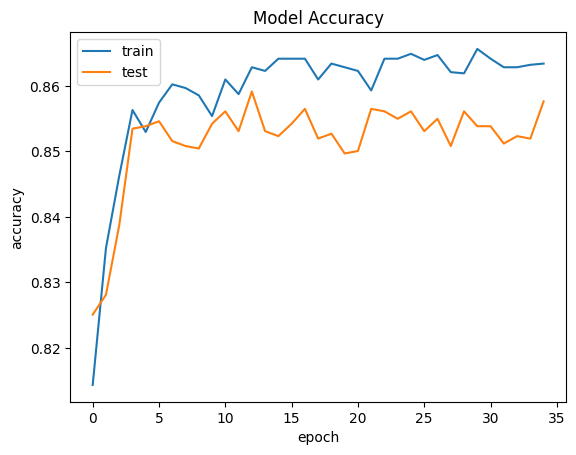

In [66]:
 #summarize history for accuracy
 plt.plot(model_history.history['accuracy'])
 plt.plot(model_history.history['val_accuracy'])
 plt.title('Model Accuracy')
 plt.xlabel('epoch')
 plt.ylabel('accuracy')
 plt.legend(['train','test'],loc='upper left')
 plt.show()

In [67]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1533,   62],
       [ 221,  184]], dtype=int64)

In [69]:
##Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [70]:
score

0.8585

In [72]:
#get the weights 
classifier.get_weights()

[array([[ 1.5492828 ,  0.3771651 , -0.27982637, -0.49396574, -0.17392844,
         -0.29518482, -1.6550318 ,  0.24659611,  0.86686283, -0.05474209,
         -0.07344124],
        [-2.1289167 , -1.8885047 ,  2.4421694 , -2.7592406 ,  1.6124095 ,
          2.5058362 , -1.2181025 , -0.9504081 ,  1.5108668 , -1.0128319 ,
          0.20552714],
        [-0.07208375,  0.10690834,  0.26862136,  0.9463535 , -0.42281136,
          0.0905164 ,  0.85998005,  1.1695939 , -0.04332466,  0.03566009,
          0.82920974],
        [-0.13372403, -0.33486208, -0.06748189,  0.18703425,  2.2948666 ,
         -2.1945014 , -0.3052563 , -2.7184074 , -1.097163  , -0.40242735,
          0.31059688],
        [-0.8043746 , -0.3183788 , -0.2285686 ,  0.09153291,  1.8013953 ,
         -3.0215042 ,  0.07128482, -0.11604176,  0.5543027 , -4.691235  ,
          3.7206533 ],
        [ 1.4971988 , -0.5213919 ,  0.0711607 ,  0.34096968,  0.08677588,
         -0.25361922, -0.7883197 , -1.0055255 , -0.10958786, -0.0380789